<a href="https://colab.research.google.com/github/chaudharygarima29/Machine_learning_projects/blob/main/KMeans_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
dataset=pd.read_csv('/content/players_15.csv')

In [17]:
dataset.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dataset.shape

(15465, 104)

In [19]:
dataset.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.0,15465.0,15465.000000,15465.000000,...,13762.000000,13762.000000,13762.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,0.0
mean,189298.588425,24.763272,181.093631,75.482703,63.948594,68.483091,0.0,0.0,1.126350,2.932363,...,60.617861,50.000799,64.602456,64.709336,60.823840,59.455079,65.955373,43.900763,61.230182,NaN
std,39648.820272,4.624565,6.635182,6.907243,7.208610,6.611708,0.0,0.0,0.401362,0.652270,...,10.800142,15.850317,9.698882,7.855747,8.510626,8.689929,8.374343,8.440858,9.188257,NaN
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.0,0.0,1.000000,1.000000,...,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,NaN
25%,178043.000000,21.000000,176.000000,70.000000,59.000000,64.000000,0.0,0.0,1.000000,3.000000,...,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,NaN
50%,200844.000000,24.000000,181.000000,75.000000,64.000000,68.000000,0.0,0.0,1.000000,3.000000,...,62.000000,53.000000,66.000000,64.000000,61.000000,59.000000,65.000000,44.000000,61.000000,NaN
75%,214326.000000,28.000000,186.000000,80.000000,69.000000,73.000000,0.0,0.0,1.000000,3.000000,...,68.000000,63.000000,72.000000,70.000000,67.000000,65.000000,72.000000,49.000000,68.000000,NaN
max,225562.000000,44.000000,203.000000,110.000000,93.000000,95.000000,0.0,0.0,5.000000,5.000000,...,96.000000,90.000000,91.000000,88.000000,87.000000,92.000000,90.000000,66.000000,90.000000,NaN


In [20]:
dataset

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,...,37+0,38+0,38+0,38+0,37+0,40+0,41+0,41+0,41+0,40+0
15461,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,...,31+0,30+0,30+0,30+0,31+0,32+0,31+0,31+0,31+0,32+0
15462,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,...,48+0,46+0,46+0,46+0,48+0,51+0,53+0,53+0,53+0,51+0
15463,222947,https://sofifa.com/player/222947/tom-davies/15...,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,...,37+0,36+0,36+0,36+0,37+0,39+0,40+0,40+0,40+0,39+0


In [31]:
features=['overall','potential','height_cm','weight_kg','age']

In [32]:
features

['overall', 'potential', 'height_cm', 'weight_kg', 'age']

In [10]:
players=dataset[features]

In [11]:
players

,overall,potential,wage_eur,value_eur,age
0,93,95,0,0,27
1,92,92,0,0,29
2,90,90,0,0,30
3,90,90,0,0,32
4,90,90,0,0,28
...,...,...,...,...,...
15460,41,61,0,0,17
15461,41,50,0,0,17
15462,40,50,0,0,18
15463,40,49,0,0,22


In [33]:
players=dataset.dropna(subset=features)

In [34]:
players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,...,37+0,38+0,38+0,38+0,37+0,40+0,41+0,41+0,41+0,40+0
15461,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,...,31+0,30+0,30+0,30+0,31+0,32+0,31+0,31+0,31+0,32+0
15462,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,...,48+0,46+0,46+0,46+0,48+0,51+0,53+0,53+0,53+0,51+0
15463,222947,https://sofifa.com/player/222947/tom-davies/15...,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,...,37+0,36+0,36+0,36+0,37+0,39+0,40+0,40+0,40+0,39+0


In [35]:
data=dataset[features].copy()

In [36]:
data

,overall,potential,height_cm,weight_kg,age
0,93,95,169,67,27
1,92,92,185,80,29
2,90,90,180,80,30
3,90,90,195,95,32
4,90,90,193,92,28
...,...,...,...,...,...
15460,41,61,187,81,17
15461,41,50,178,57,17
15462,40,50,190,76,18
15463,40,49,180,70,22


In [37]:
data=((data-data.min())/(data.max()-data.min()))*9+1

In [38]:
data

,overall,potential,height_cm,weight_kg,age
0,10.000000,10.000000,3.6250,3.55,4.535714
1,9.830189,9.509091,6.6250,5.50,5.178571
2,9.490566,9.181818,5.6875,5.50,5.500000
3,9.490566,9.181818,8.5000,7.75,6.142857
4,9.490566,9.181818,8.1250,7.30,4.857143
...,...,...,...,...,...
15460,1.169811,4.436364,7.0000,5.65,1.321429
15461,1.169811,2.636364,5.3125,2.05,1.321429
15462,1.000000,2.636364,7.5625,4.90,1.642857
15463,1.000000,2.472727,5.6875,4.00,2.928571


In [39]:
data.describe()

,overall,potential,height_cm,weight_kg,age
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000
mean,5.066742,5.660869,5.892556,4.822405,3.816766
std,1.224104,1.081916,1.244097,1.036087,1.486467
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.226415,4.927273,4.937500,4.000000,2.607143
50%,5.075472,5.581818,5.875000,4.750000,3.571429
75%,5.924528,6.400000,6.812500,5.500000,4.857143
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [48]:
data.head()

,overall,potential,height_cm,weight_kg,age
0,10.000000,10.000000,3.6250,3.55,4.535714
1,9.830189,9.509091,6.6250,5.50,5.178571
2,9.490566,9.181818,5.6875,5.50,5.500000
3,9.490566,9.181818,8.5000,7.75,6.142857
4,9.490566,9.181818,8.1250,7.30,4.857143


In [55]:
def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x:float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [77]:
#centroids=random_centroids(data,5)

/tmp/ipython-input-2894379515.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x:float(x.sample()))


In [62]:
centroids

,0,1,2,3,4
overall,4.396226,2.867925,4.396226,6.773585,6.094340
potential,8.036364,3.618182,5.745455,4.927273,4.763636
height_cm,8.500000,8.500000,5.875000,6.812500,3.812500
weight_kg,4.300000,3.700000,3.850000,5.050000,4.300000
age,2.928571,3.892857,4.214286,3.892857,2.285714


In [78]:
#np.sqrt(((data-centroids.iloc[:,0])**2).sum(axis=1))
def get_labels(data,centroids):
  distances=centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [79]:
labels=get_labels(data,centroids)

In [80]:
labels.value_counts()

,count
1,5565
2,3641
4,2810
3,2148
0,1301


In [89]:
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x:x.mean()).T
#data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean()))

In [91]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [92]:
def plot_clusters(data,labels,centroids,iteration):
  pca=PCA(n_components=2)
  data_2d=pca.fit_transform(data)
  centroids_2d=pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration{iteration}')
  plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
  plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
  plt.show()

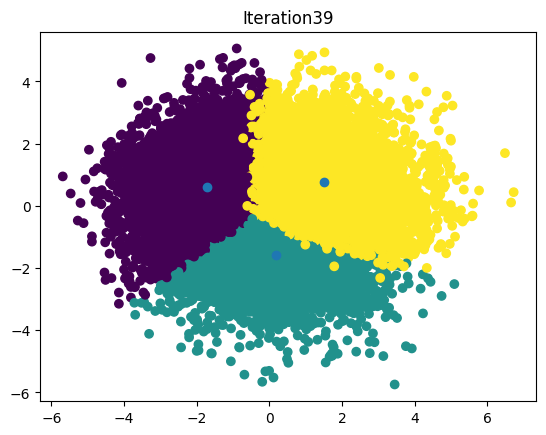

In [101]:
max_iteration=100
#centroid_count=3
k=3
centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1
while iteration<max_iteration and not centroids.equals(old_centroids):
  old_centroids=centroids
  labels=get_labels(data,centroids)
  centroids=new_centroids(data,labels,k)
  plot_clusters(data,labels,centroids,iteration)
  iteration=iteration+1

In [104]:
centroids

,0,1,2
overall,3.872905,5.876229,5.532875
potential,5.039077,6.406002,5.629218
height_cm,5.836313,4.936374,6.757949
weight_kg,4.617213,4.132239,5.605977
age,2.596423,3.805571,5.004640


In [110]:
players[labels==2][['short_name']+features]

,short_name,overall,potential,height_cm,weight_kg,age
3,Z. Ibrahimović,90,90,195,95,32
4,M. Neuer,90,90,193,92,28
20,T. Courtois,86,90,199,88,22
21,M. Hummels,86,88,192,90,25
28,Y. Touré,86,86,189,90,31
...,...,...,...,...,...,...
15156,J. Kolstad,50,50,187,87,37
15282,P. Mathers,49,49,183,72,44
15283,A. Bayes,49,49,185,85,42
15455,B. Richardson,43,43,185,77,44


In [111]:
from sklearn.cluster import KMeans

In [112]:
kmeans=KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [113]:
centroids=kmeans.cluster_centers_

In [114]:
centroids

array([[5.85028101, 6.3888588 , 4.92409574, 4.12070213, 3.78870061],
       [5.54858817, 5.64290631, 6.75530124, 5.60339461, 5.0087303 ],
       [3.86585196, 5.03046515, 5.85685828, 4.63406375, 2.59939833]])

In [115]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
overall,5.850281,5.548588,3.865852
potential,6.388859,5.642906,5.030465
height_cm,4.924096,6.755301,5.856858
weight_kg,4.120702,5.603395,4.634064
age,3.788701,5.008730,2.599398
